<a href="https://colab.research.google.com/github/ChinmaySN/customer-insurance-prediction/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Models and scaler saved!


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


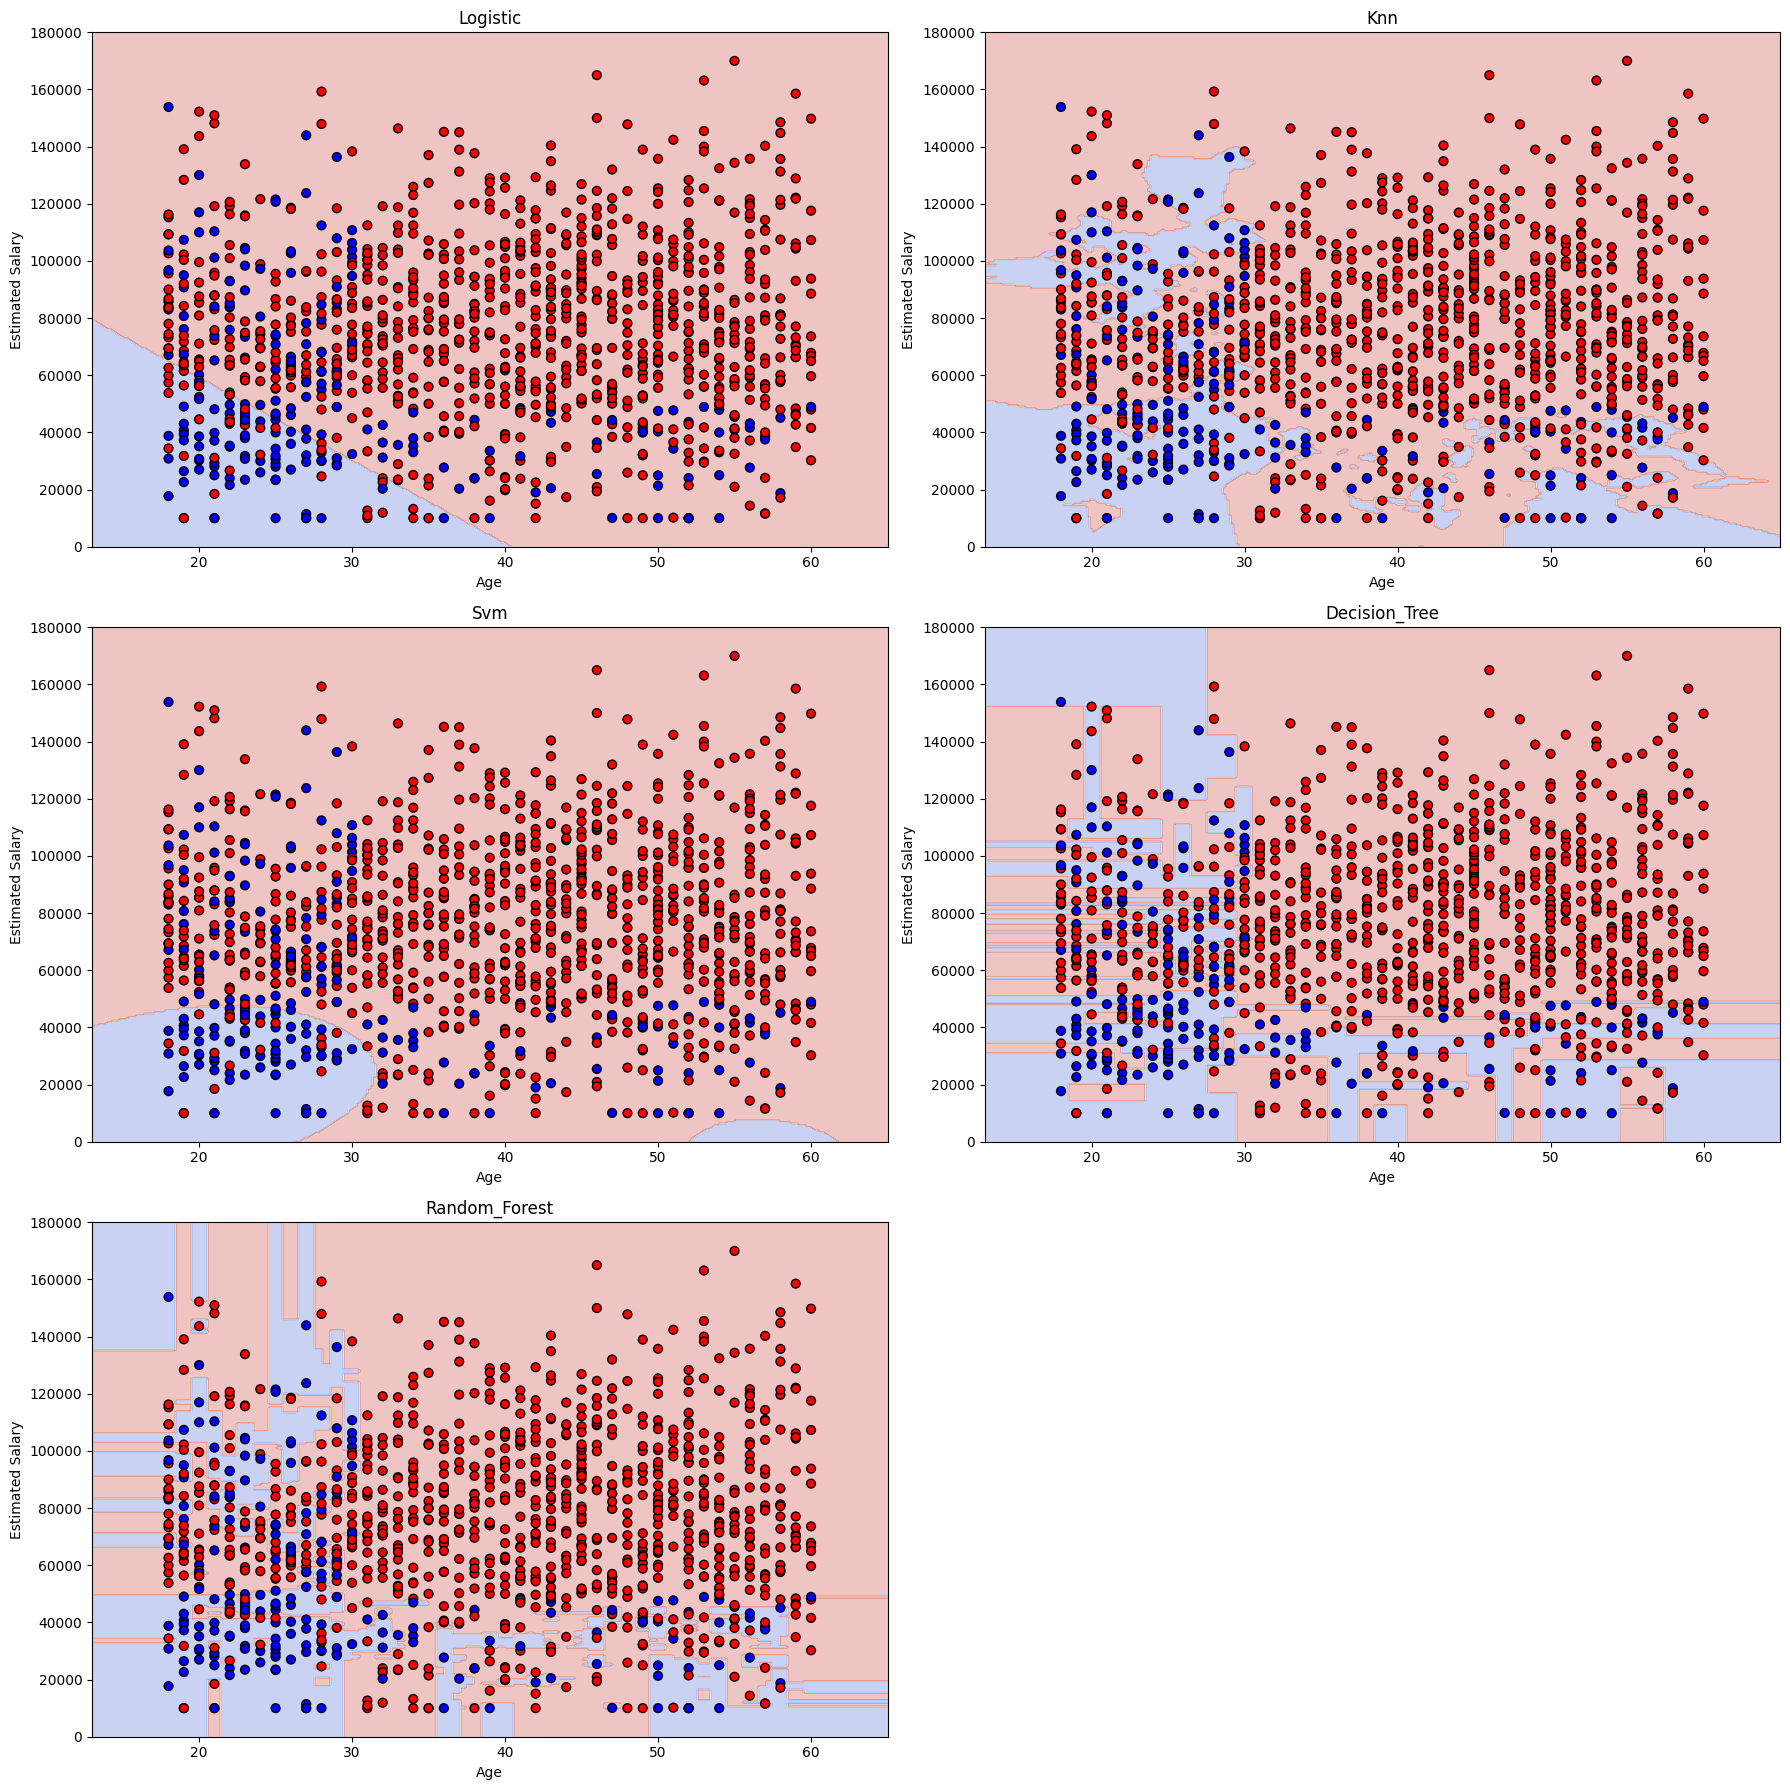

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load your dataset
data = pd.read_csv("insurance_data.csv")  # or path to your file

# Features and label
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize models
models = {
    "logistic_model.pkl": LogisticRegression(),
    "knn_model.pkl": KNeighborsClassifier(),
    "svm_model.pkl": SVC(probability=True),
    "decision_tree_model.pkl": DecisionTreeClassifier(),
    "random_forest_model.pkl": RandomForestClassifier()
}

# Train and save each model
for filename, model in models.items():
    model.fit(X_train_scaled, y_train)
    joblib.dump(model, filename)

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

print("Models and scaler saved!")

def plot_decision_boundary(model, scaler, ax, title):
    age_range = np.linspace(X['Age'].min() - 5, X['Age'].max() + 5, 300)
    salary_range = np.linspace(X['EstimatedSalary'].min() - 10000, X['EstimatedSalary'].max() + 10000, 300)
    xx, yy = np.meshgrid(age_range, salary_range)

    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    Z = model.predict(grid_scaled).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    ax.scatter(X['Age'], X['EstimatedSalary'], c=y, edgecolor='k', cmap='bwr', s=40)
    ax.set_title(title)
    ax.set_xlabel("Age")
    ax.set_ylabel("Estimated Salary")

# === PLOT ALL MODELS ===
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
axes = axes.flatten()

for i, (filename, model) in enumerate(models.items()):
    model_loaded = joblib.load(filename)
    plot_decision_boundary(model_loaded, scaler, axes[i], title=filename.replace("_model.pkl", "").title())

# Remove unused subplot
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

In [4]:
import os
os.listdir()

['.config',
 'random_forest_model.pkl',
 'logistic_model.pkl',
 'decision_tree_model.pkl',
 'knn_model.pkl',
 'insurance_data.csv',
 'scaler.pkl',
 'svm_model.pkl',
 'sample_data']